<a href="https://colab.research.google.com/github/tehseen-h/Titanic-Prediction/blob/main/Titanic_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load Dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#checking for values and do some EDA to get better undersatnding of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
data.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#there are 177 null values in Age column '
'''Need to fix it'''

'Need to fix it'

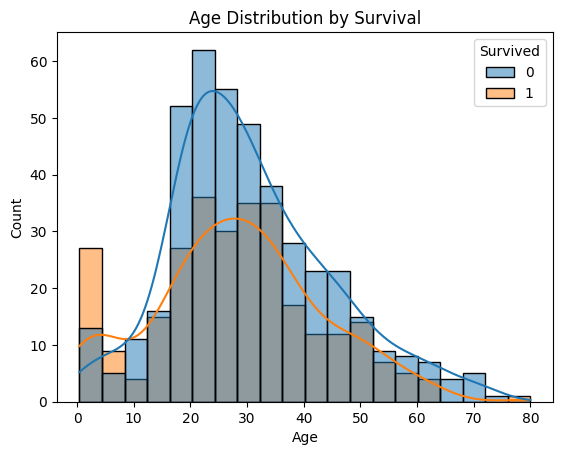

In [ ]:
sns.histplot(data=data, x='Age', bins=20, kde=True, hue='Survived')
plt.title('Age Distribution by Survival')
plt.show()


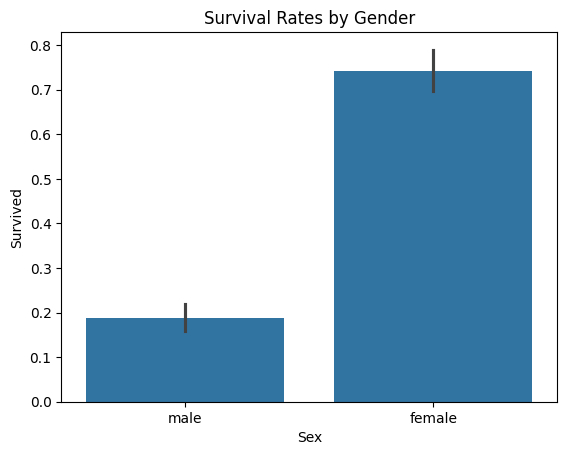

In [ ]:
sns.barplot(data=data, x='Sex', y='Survived')
plt.title('Survival Rates by Gender')
plt.show()

In [ ]:
data.to_csv('eda_output.csv', index=False) #saving the eda

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Drop those columns that are unuccery
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
data['Age'].fillna(data['Age'].median(), inplace = True)

In [ ]:
data['Age'].value_counts()

In [ ]:
#filling 2 missing embarked values with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
data2 = data.copy()

In [ ]:

data2

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,1
887,1,1,19.0,0,0,30.0000,2,0
888,0,3,28.0,1,2,23.4500,2,0
889,1,1,26.0,0,0,30.0000,0,1


In [ ]:
#Converting Text Data into numbers for ML
data2 = data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data2 = pd.get_dummies(data, columns=['Sex'], drop_first=True)

In [ ]:
#converting Gender Bool values to 0s and 1s
data2['Sex_male'] = data2['Sex_male'].astype(int)

In [ ]:
data2

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,2.0,1
1,1,1,38.0,1,0,71.2833,0.0,0
2,1,3,26.0,0,0,7.9250,2.0,0
3,1,1,35.0,1,0,53.1000,2.0,0
4,0,3,35.0,0,0,8.0500,2.0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2.0,1
887,1,1,19.0,0,0,30.0000,2.0,0
888,0,3,NaN,1,2,23.4500,2.0,0
889,1,1,26.0,0,0,30.0000,0.0,1


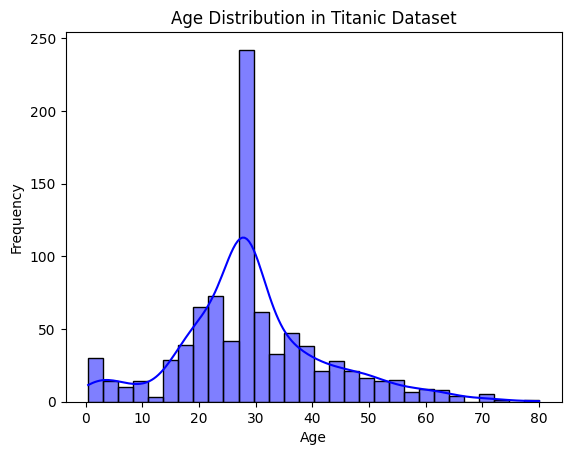

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot age distribution
sns.histplot(data2['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Here you can see one of the PLot is much high because we use Median to fill these values
'''We will make change on it in Part 2 of this Notebook. But First we will train on this Dataset'''

In [ ]:
data2.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Sex_male,0


In [ ]:
X = data2.drop('Survived', axis = 1)
y = data2['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Trainng the model with Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter = 200)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
model.score(X_test, y_test)

0.776536312849162

In [ ]:
model

LogisticRegression(max_iter=200)

Additionally, we will checkby training with the Random Forest model to see which model achieves a better score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model1.score(X_test, y_test)

0.8100558659217877

Based on the scores of both models, the Random Forest model achieves a better score, so we will beep model1

```
# This is formatted as code
```



In [ ]:
#Save the model
import joblib
joblib.dump(model1, 'titanic_model.pkl')

['titanic_model.pkl']

#Part 2
#Filling missing Age values using a machine learning approach
We satrt again, Instead of filling age column with mode or mean we use ML here


In [ ]:
df1 = pd.read_csv('/content/Titanic-Dataset.csv')


In [ ]:
df1 = pd.get_dummies(df1, columns=['Sex'], drop_first=True)
df1['Sex_male'] = df1['Sex_male'].astype(int)

In [ ]:
train_data = df1[df1['Age'].notnull()]  # Rows where Age is NOT null
test_data = df1[df1['Age'].isnull()]    # Rows where Age IS null

print(train_data.shape)
print(test_data.shape)

(714, 12)
(177, 12)


In [ ]:
features = ['Pclass', 'Fare', 'SibSp', 'Parch', 'Sex_male']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
mode2 = RandomForestRegressor(random_state=42)
mode2.fit(train_data[features], train_data['Age'])

In [ ]:
# Predict missing Age values
test_data['Age'] = mode2.predict(test_data[features])

# Replace missing Age values in the original DataFrame
df1.loc[df1['Age'].isnull(), 'Age'] = test_data['Age']

In [ ]:
df1['Age'].value_counts().head(15)

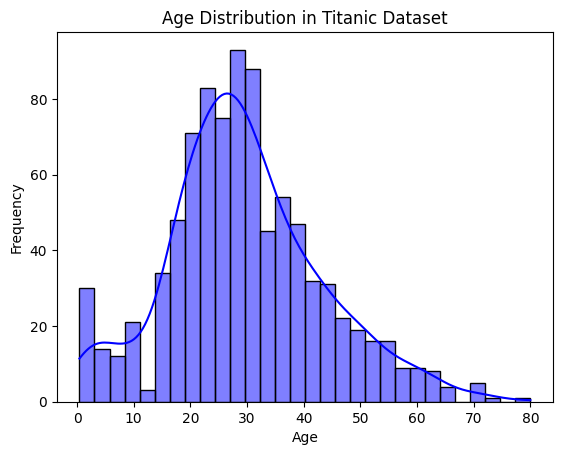

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot age distribution
sns.histplot(df1['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Now here we can see the age has better distribution, from earlier approach

In [ ]:
df1.isnull().sum()

In [ ]:
df1['Embarked'] = df1['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [ ]:
df1

In [ ]:
df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [ ]:
X = df1.drop('Survived', axis = 1)
y = df1['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

In [ ]:
model2.score(X_test, y_test)

0.8324022346368715

# We will keep model2 as it comes with better score
"Here you can see this model comes with better score of 83% accuracy. While earlier we checked we got max 81% score"

#Predicting values

In [ ]:
import numpy as np

#chose Class from 1st to 3rd
p_class = 2

#Write age
age = 25

#write siblings
sib_sp = 0

#Write parents
par_ch = 0

#write how much he gie the fare
Fare = 7.25

'''select port of embarkation, Where
C: Cherbourg = 0
Q: Queenstown = 1
S: Southampton = 2 '''
Embarked = 2

# Select the Gender. Male = 1, Famale = 0
Sex = 0

#input_data = np.array([[3, 25, 0, 0, 7.25, 1, 1]])
input_data = np.array([[p_class, age, sib_sp, par_ch, Fare, Embarked, Sex]])

# Predict using the model
model2.predict(input_data)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#Save the model
import joblib
joblib.dump(model2, 'titanic_model2.pkl')